In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tashkent-real-estate-2019/uybor.xlsx


# *Kerakli kutubxonalarni chaqirib olamiz*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# *Ma'lumotlar to'plamini o'qib olamiz*

In [3]:
df=pd.read_excel("/kaggle/input/tashkent-real-estate-2019/uybor.xlsx")
df.head(5)

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Chilonzor район, площадь Актепа",Chilonzor,3,70.0,3,5,55000,41.300156,69.210831


In [4]:
df.shape

(7421, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     7421 non-null   object 
 1   district    7421 non-null   object 
 2   rooms       7421 non-null   int64  
 3   size        7421 non-null   float64
 4   level       7421 non-null   int64  
 5   max_levels  7421 non-null   int64  
 6   price       7421 non-null   int64  
 7   lat         7421 non-null   float64
 8   lng         7421 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 521.9+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,7421.0,2.619728,1.076887,1.000000,2.000000,3.000000,3.000000,10.000000
size,7421.0,73.150726,36.999670,14.000000,50.000000,65.000000,85.000000,456.000000
level,7421.0,3.699367,2.239028,1.000000,2.000000,3.000000,5.000000,19.000000
max_levels,7421.0,6.031397,2.607673,1.000000,4.000000,5.000000,9.000000,25.000000
price,7421.0,59117.618919,46701.090308,10500.000000,35000.000000,46500.000000,66847.000000,800000.000000
lat,7421.0,41.303620,0.033771,41.186375,41.281265,41.296388,41.324956,41.424522
lng,7421.0,69.256615,0.059061,69.148915,69.205802,69.260189,69.293713,69.588687


In [7]:
df.isna().sum()


address       0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
lat           0
lng           0
dtype: int64

#  ***Takroriy qiymatlar borligini tekshiramiz agar bo'lsa ularni o'chiramiz***

In [8]:
df.duplicated().sum()

696

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(6725, 9)

# *Keling, ma'lumotlar to'plamini tuzamiz va qiziqarli tendentsiyalarni/statistikalarni ko'ramiz.*

In [10]:
df.columns

Index(['address', 'district', 'rooms', 'size', 'level', 'max_levels', 'price',
       'lat', 'lng'],
      dtype='object')

In [11]:
df=df[['rooms', 'size','price']]

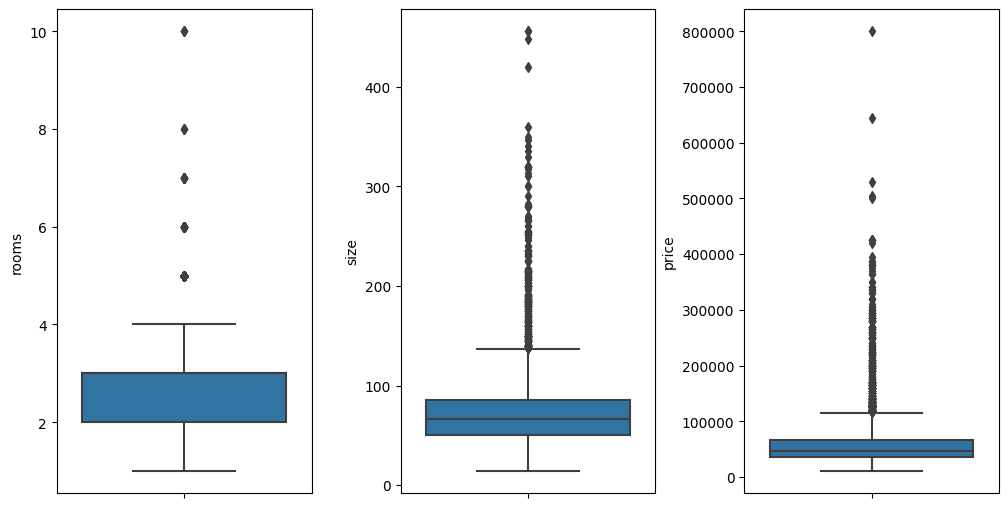

In [12]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10, 5))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

*'rooms', 'size', 'price' ustunlarida og'ish borga o'xshaydi. Bu ustunlar uchun og'ishlarni ko'ramiz* 

In [13]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column rooms outliers = 4.07%
Column size outliers = 4.54%
Column price outliers = 7.64%


/tmp/ipykernel_18/1825466852.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/1825466852.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a

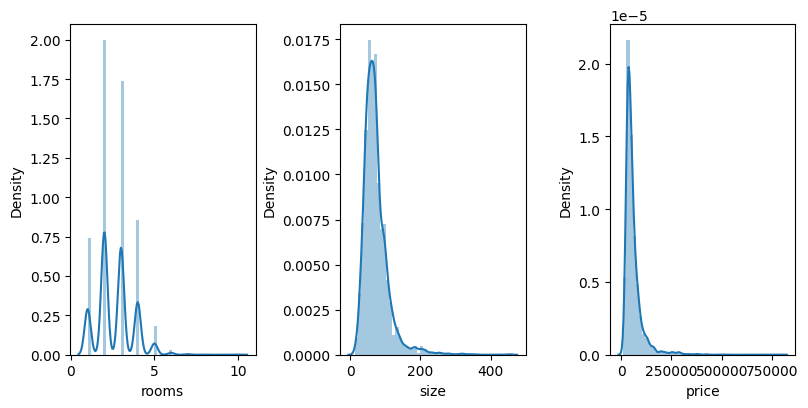

In [14]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(8, 4))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [15]:
df=df[df['rooms']<6]
df=df[df['size']<300]
df=df[df['price']<300000]


/tmp/ipykernel_18/1825466852.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/1825466852.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a

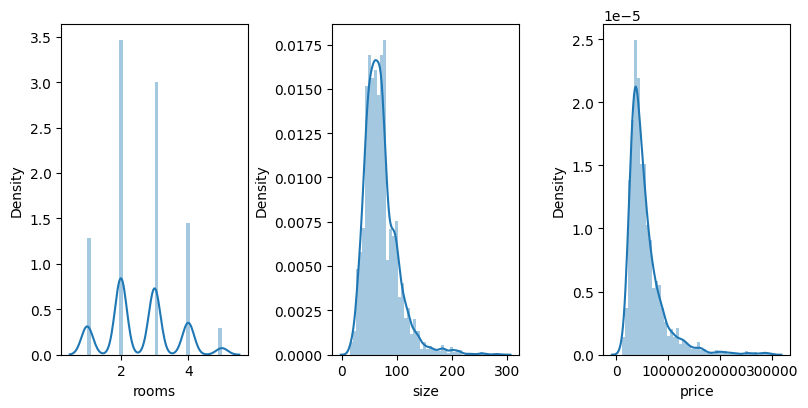

In [16]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(8, 4))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

# *Endi ma’lumotlar bo‘yicha juftlik korrelyatsiyasini chizamiz.*

<Axes: >

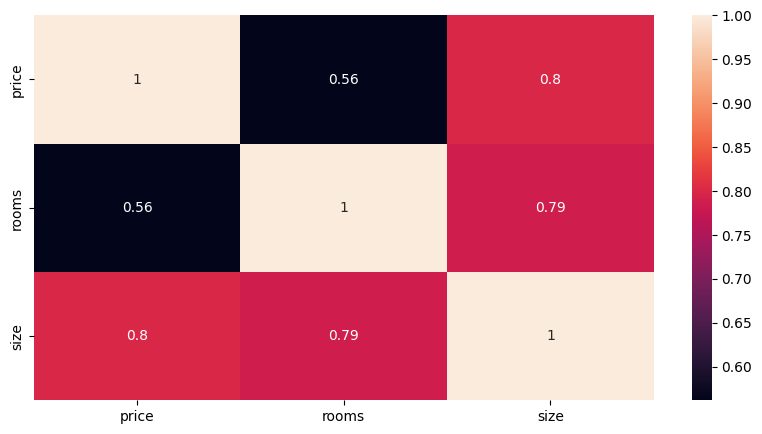

In [17]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[['price','rooms','size']].corr().abs(),  annot=True)

*Korrelyatsiya matritsasidan ko'rinib turibdiki 'rooms'ni 'price' bilan korrelyatsiyasi(0.56) 'size' ni 'price' bilan korrelyatsiyasidan(0.8) sezilarli kichik. Shunga qaramay 'rooms' va 'size' uy narxini bashorat qilish uchun yaxshi indikatorlar chunki ularning korrelyatsiyasi 0.5 dan yuqori. 'rooms' va 'size' ning korrelyatsiyasi esa 0.79 ga teng,*

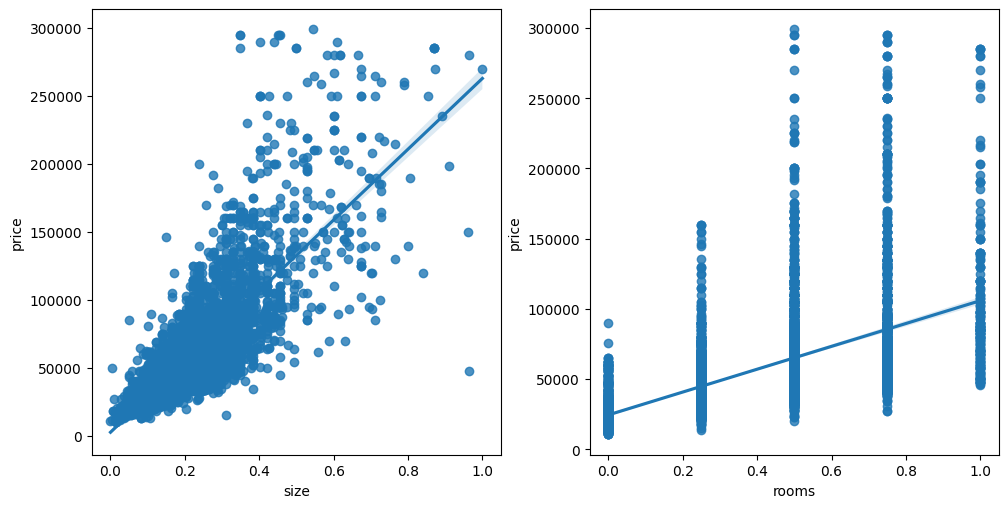

In [18]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against price
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['size','rooms']
x = df.loc[:,column_sels]
y = df['price']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)